In [ ]:
# Question1

In [347]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas.io.sql
import pyodbc
import seaborn as sns
%matplotlib inline
import datetime as dt

In [348]:
server = 'DELL\SQLEXPRESS'
db = 'loan'

# Create the connection with SQL server
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=' +server + ';DATABASE=' + db + ';Trusted_Connection=yes')

# query db
sql = """

SELECT * FROM Loans where status='B'

"""
sql2 ="""

SELECT * FROM accounts 

"""
sql3 ="""

SELECT * FROM demographics 

"""
sql4 = """

SELECT * FROM transactions 

"""
sql5 ="""

SELECT * FROM disposition 

"""
sql6 ="""

SELECT * FROM credit_card

"""
sql7 ="""

SELECT * FROM clients

"""
df1 = pandas.io.sql.read_sql(sql, conn)
df2 = pandas.io.sql.read_sql(sql2, conn)
df3 = pandas.io.sql.read_sql(sql3, conn)
trans = pandas.io.sql.read_sql(sql4, conn)
disp = pandas.io.sql.read_sql(sql5, conn)
credit = pandas.io.sql.read_sql(sql6, conn)
clients = pandas.io.sql.read_sql(sql7, conn)

In [349]:
# Loan Defauter
df1

,disp_id,loan_id,account_id,date,amount,duration,payments,status
0,501,1001,115,2011-10-04,100000,5,1666.66,B
1,505,1005,112,1998-02-03,580000,15,3222.22,B
2,506,1006,114,2012-09-11,150000,5,2500.00,B
3,509,1009,118,1994-05-21,150000,20,625.00,B


In [4]:
# Question2

In [350]:
df4 = pd.merge(df1[['account_id','status','loan_id']],df2[['account_id','district_id']],how='inner',on='account_id')

In [351]:
df4

,account_id,status,loan_id,district_id
0,115,B,1001,15
1,112,B,1005,12
2,114,B,1006,14
3,118,B,1009,18


In [352]:
df5 = pd.merge(df4,df3[['district_id','district_name']],how='inner',on='district_id')

In [353]:
df5

,account_id,status,loan_id,district_id,district_name
0,115,B,1001,15,Bhubaneswar
1,112,B,1005,12,Bangalore
2,114,B,1006,14,Bhopal
3,118,B,1009,18,Hyderabad


In [355]:
df5.corr()

,account_id,loan_id,district_id
account_id,1.00000,0.45399,1.00000
loan_id,0.45399,1.00000,0.45399
district_id,1.00000,0.45399,1.00000


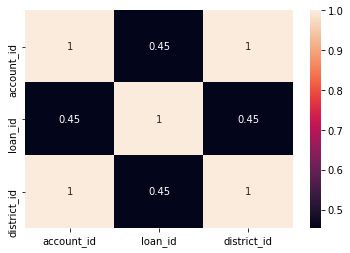

In [354]:
sns.heatmap(df5.corr(),annot=True)

In [12]:
# Question3

In [356]:
trans

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,11111,111,1991-09-11,PRIJEM,PREVOD Z UCTU,500,200000,POJISTNE,ST,120
1,11112,112,1997-03-01,VYDAJ,VYBER KARTOU,50000,400000,SLUZBY,QR,119
2,11113,113,2011-09-25,VYDAJ,VKLAD,95000,500000,UROK,OP,118
3,11114,114,2012-06-14,PRIJEM,PREVOD Z UCTU,5000,50000,SANKC. UROK,MN,117
4,11115,115,1990-09-11,PRIJEM,PREVOD NA UCET,60000,90000,SIPO,KL,116
5,11116,116,1999-02-02,VYDAJ,VYBER,10000,300000,DUCHOD,IJ,115
6,11117,117,2013-11-29,PRIJEM,PREVOD Z UCTU,1000,50000,UVER,GH,114
7,11118,118,1993-04-21,VYDAJ,VKLAD,25000,50000,POJISTNE,EF,113
8,11119,119,2014-06-20,PRIJEM,PREVOD NA UCET,75000,40000,UROK,CD,112
9,11120,120,1999-01-09,VYDAJ,VYBER,3000,250000,SIPO,AB,111


In [369]:
trans1= trans.groupby('account_id',as_index=False)['balance'].mean()

In [365]:
df9 = pd.merge(disp[['disp_id','account_id']],credit[['disp_id','type']],how='inner',on='disp_id')

In [366]:
df9

,disp_id,account_id,type
0,502,111,Classic
1,505,112,Gold


In [367]:
result = pd.merge(df9,trans1,how='inner',on='account_id')

In [370]:
result

,disp_id,account_id,type,balance
0,502,111,Classic,200000
1,505,112,Gold,400000


In [371]:
# Question 4a

min_trans =trans.groupby('account_id',as_index=False)['date'].min()

In [372]:
min_trans

,account_id,date
0,111,1991-09-11
1,112,1997-03-01
2,113,2011-09-25
3,114,2012-06-14
4,115,1990-09-11
5,116,1999-02-02
6,117,2013-11-29
7,118,1993-04-21
8,119,2014-06-20
9,120,1999-01-09


In [373]:
df10=pd.merge(df2[['district_id','account_id']],min_trans,how='inner',on='account_id')

In [374]:
df10

,district_id,account_id,date
0,11,111,1991-09-11
1,12,112,1997-03-01
2,13,113,2011-09-25
3,14,114,2012-06-14
4,15,115,1990-09-11
5,16,116,1999-02-02
6,17,117,2013-11-29
7,18,118,1993-04-21
8,19,119,2014-06-20
9,20,120,1999-01-09


In [375]:
# Calculating age of client
clients['birth_number'] = pd.to_datetime(clients['birth_number'])
now = dt.datetime.now()    
clients['age'] = now - clients['birth_number']
clients['age']

0    9818 days 01:20:32.498000
1   10149 days 01:20:32.498000
2   10816 days 01:20:32.498000
3   15634 days 01:20:32.498000
4   11723 days 01:20:32.498000
5   16450 days 01:20:32.498000
6   11555 days 01:20:32.498000
7   13449 days 01:20:32.498000
8   13957 days 01:20:32.498000
9   15328 days 01:20:32.498000
Name: age, dtype: timedelta64[ns]

In [376]:
clients

,client_id,birth_number,sex,district_id,age
0,3001,1991-02-11,men,15,9818 days 01:20:32.498000
1,3002,1990-03-17,women,11,10149 days 01:20:32.498000
2,3003,1988-05-19,men,13,10816 days 01:20:32.498000
3,3004,1975-03-11,men,17,15634 days 01:20:32.498000
4,3005,1985-11-24,men,12,11723 days 01:20:32.498000
5,3006,1972-12-15,women,14,16450 days 01:20:32.498000
6,3007,1986-05-11,men,16,11555 days 01:20:32.498000
7,3008,1981-03-04,men,19,13449 days 01:20:32.498000
8,3009,1979-10-13,women,18,13957 days 01:20:32.498000
9,3010,1976-01-11,men,20,15328 days 01:20:32.498000


In [377]:
distribution1=pd.merge(df10,clients[['district_id','age','sex']],how='inner',on='district_id')

In [378]:
distribution1

,district_id,account_id,date,age,sex
0,11,111,1991-09-11,10149 days 01:20:32.498000,women
1,12,112,1997-03-01,11723 days 01:20:32.498000,men
2,13,113,2011-09-25,10816 days 01:20:32.498000,men
3,14,114,2012-06-14,16450 days 01:20:32.498000,women
4,15,115,1990-09-11,9818 days 01:20:32.498000,men
5,16,116,1999-02-02,11555 days 01:20:32.498000,men
6,17,117,2013-11-29,15634 days 01:20:32.498000,men
7,18,118,1993-04-21,13957 days 01:20:32.498000,women
8,19,119,2014-06-20,13449 days 01:20:32.498000,men
9,20,120,1999-01-09,15328 days 01:20:32.498000,men


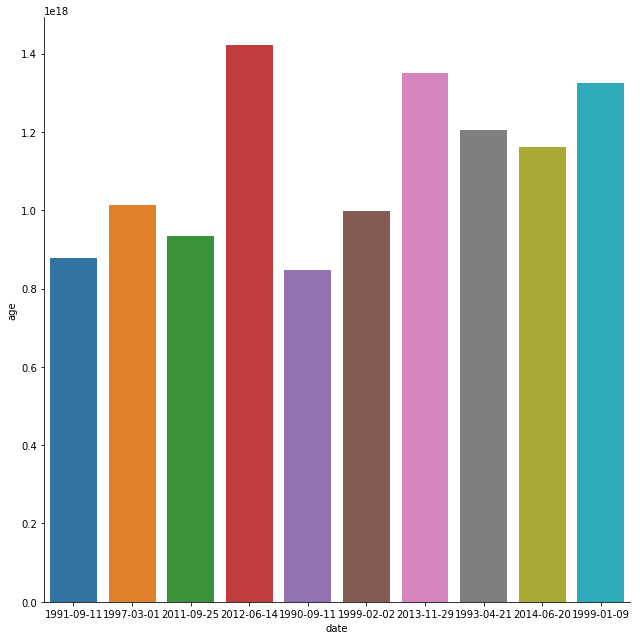

In [388]:
sns.factorplot(x='date',y='age',data=distribution1,kind='bar',size=9)

In [ ]:
# Question 4b
sns.factorplot(x='date',y='age',data=distribution1,kind='bar',size=8,hue='sex')

In [380]:
distribution1.dtypes

district_id              int64
account_id               int64
date                    object
age            timedelta64[ns]
sex                     object
dtype: object

In [ ]:
# Question 4c

In [381]:
distribution2=pd.merge(df3[['district_id','Average_Salary']],clients[['district_id','client_id']],how='inner',on='district_id')

In [382]:
distribution2

,district_id,Average_Salary,client_id
0,15,5000,3001
1,14,60000,3006
2,13,30000,3003
3,12,50000,3005
4,11,10000,3002
5,16,20000,3007
6,17,15000,3004
7,18,45000,3009
8,19,35000,3008
9,20,55000,3010


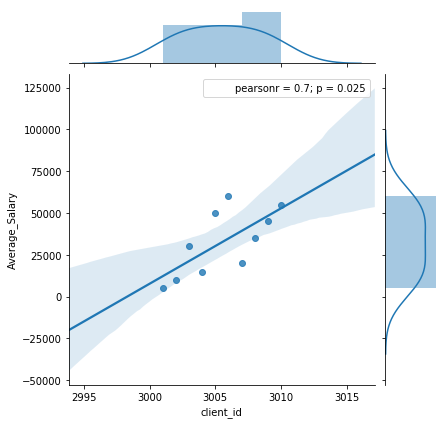

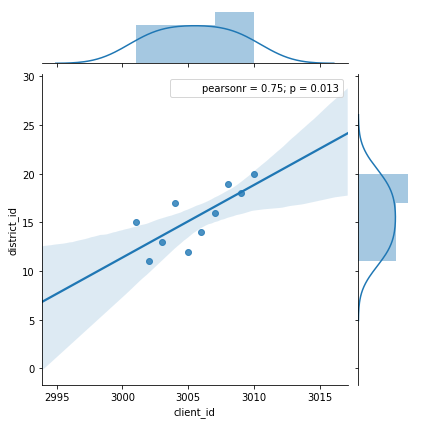

In [383]:
sns.jointplot(x='client_id',y='Average_Salary',data=distribution2,kind='reg')
sns.jointplot(x='client_id',y='district_id',data=distribution2,kind='reg')

In [265]:
# Question 4d

In [384]:
df11=trans.groupby('account_id',as_index=False)['amount'].mean()
df11

,account_id,amount
0,111,500
1,112,50000
2,113,95000
3,114,5000
4,115,60000
5,116,10000
6,117,1000
7,118,25000
8,119,75000
9,120,3000


In [385]:
avg_trans=pd.merge(df11,df2[['district_id','account_id']],how='inner',on='account_id')
avg_trans

,account_id,amount,district_id
0,111,500,11
1,112,50000,12
2,113,95000,13
3,114,5000,14
4,115,60000,15
5,116,10000,16
6,117,1000,17
7,118,25000,18
8,119,75000,19
9,120,3000,20


In [386]:
distribution3= pd.merge(avg_trans,clients,how='inner',on='district_id')
distribution3

,account_id,amount,district_id,client_id,birth_number,sex,age
0,111,500,11,3002,1990-03-17,women,10149 days 01:20:32.498000
1,112,50000,12,3005,1985-11-24,men,11723 days 01:20:32.498000
2,113,95000,13,3003,1988-05-19,men,10816 days 01:20:32.498000
3,114,5000,14,3006,1972-12-15,women,16450 days 01:20:32.498000
4,115,60000,15,3001,1991-02-11,men,9818 days 01:20:32.498000
5,116,10000,16,3007,1986-05-11,men,11555 days 01:20:32.498000
6,117,1000,17,3004,1975-03-11,men,15634 days 01:20:32.498000
7,118,25000,18,3009,1979-10-13,women,13957 days 01:20:32.498000
8,119,75000,19,3008,1981-03-04,men,13449 days 01:20:32.498000
9,120,3000,20,3010,1976-01-11,men,15328 days 01:20:32.498000


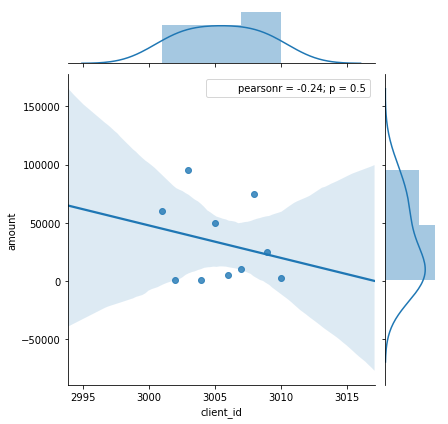

In [387]:
sns.jointplot(x='client_id',y='amount',data=distribution3,kind='reg')